In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from datetime import date
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [2]:
train = pd.read_csv('1601279063_Data_Classification.csv')
train.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Admission
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


# Q1

In [3]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Admission'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Admission'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Admission'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Admission'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.best_estimator_.feature_importances_, predictors).sort_values(ascending=True)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return feat_imp


Model Report
Accuracy : 0.784
AUC Score (Train): 0.847516
CV Score : Mean - 0.8329545 | Std - 0.05684592 | Min - 0.747362 | Max - 0.914164


LOR                  0.034185
SOP                  0.043265
University Rating    0.082048
TOEFL Score          0.191435
CGPA                 0.261400
GRE Score            0.387667
dtype: float64

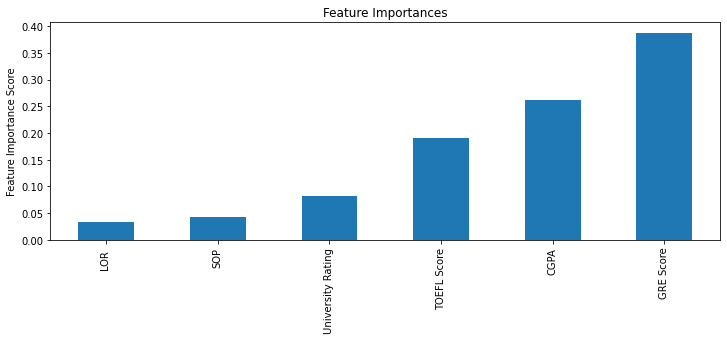

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
predictors = [x for x in train.columns if x not in ['Admission']]
param_test1 = {'n_estimators':[100,200,300], 'max_depth':[4,5,6], 'min_samples_split':[2,3,4,5], 'criterion':['gini', 'entropy']}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_leaf=50,max_features='sqrt',random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=2, cv=5)
modelfit(gsearch1, train, predictors)

In [6]:
for i in ['mean_test_score', 'std_test_score', 'param_n_estimators']:
    print(i," : ",gsearch1.cv_results_[i])
    
print("best parameter : ",gsearch1.best_params_)
print("best score :", gsearch1.best_score_)

mean_test_score  :  [0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83080357 0.83153409 0.83319805 0.83080357 0.83153409 0.83319805
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506
 0.83169643 0.8325487  0.83368506 0.83169643 0.8325487  0.83368506]
std_test_score  :  [0.05383005 0.05532765 0.05472986 0.05383005 0.05532765 0.05472986
 0.05383005 0.05532765 0.05472986 0.05383005 0.05532765 0.05472986
 0.05383005 0.05532765

# Q2

In [16]:
#### Creating datatset with Dependent and indepent varaibles
Dependent=train["Admission"]
IndependentCols=['GRE Score','CGPA','TOEFL Score','University Rating']
Independent=train[IndependentCols]

## fitting a base gbm model
rf1 = RandomForestClassifier(random_state=10, criterion='entropy', max_depth=4, min_samples_split=2, n_estimators=300) ## initialising base rf model
rf1.fit(Independent, Dependent)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=300,
                       random_state=10)

In [25]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_train_pred = rf1.predict(Independent)
print("\nAccuracy Score:")
print(accuracy_score(Dependent, y_train_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Dependent, y_train_pred))
print("\nClassification Report:")
print(classification_report(Dependent, y_train_pred))


Accuracy Score:
0.8

Confusion Matrix:
[[190  30]
 [ 70 210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       220
           1       0.88      0.75      0.81       280

    accuracy                           0.80       500
   macro avg       0.80      0.81      0.80       500
weighted avg       0.81      0.80      0.80       500




Average Precision Score:


0.79625

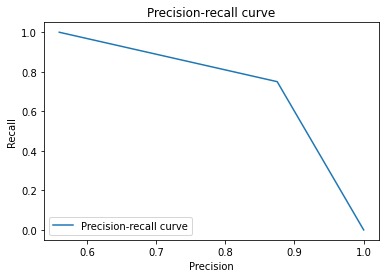

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(Dependent, y_train_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

print("\nAverage Precision Score:")
average_precision_score(Dependent, y_train_pred)


Area Under Curve:


0.8068181818181819

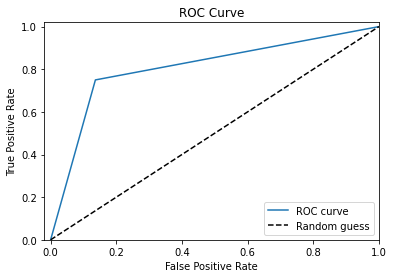

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Dependent, y_train_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

print("\nArea Under Curve:")
roc_auc_score(Dependent, y_train_pred)

In [2]:
train2 = pd.read_csv('1601279050_Wholesale_Customers.csv')
train2.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


# Q3

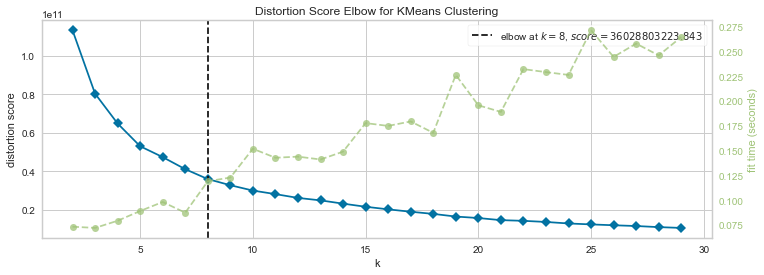

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(train2)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
# Higher the Dunn index value, better is the clustering. The number of clusters that maximizes Dunn index is taken as the optimal number of clusters k.
# Lower the DB index value, better is the clustering.

# Q4

In [36]:
from sklearn.preprocessing import StandardScaler
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
# Separating out the features
x = train.loc[:, features].values
# Separating out the target
y = train.loc[:,['Admission']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, train[['Admission']]], axis = 1)
finalDf.head(2)

,principal component 1,principal component 2,Admission
0,-3.454599,0.715382,1
1,-1.446694,-0.673291,1


In [47]:
print("\nThe actual eigenvalues (variance):")
print(pca.explained_variance_)
print("\nThe percentage of the variance:")
print(pca.explained_variance_ratio_)


The actual eigenvalues (variance):
[4.39653685 0.63245315]

The percentage of the variance:
[0.73129063 0.10519804]


In [48]:
# Both LDA and PCA are linear transformation techniques:
# LDA is a supervised whereas PCA is unsupervised and ignores class labels.
# We can picture PCA as a technique that finds the directions of maximal variance.
# In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability.

In [49]:
# Dims: They are the number of dimensions the data must be reduced to.
# Perplexity: It can be interpreted as a smooth measure of the effective number of neighbours. The performance of SNE is fairly robust to changes in the preplexity, and typical values are between 5 and 50.

# Q5

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

predictors = [x for x in train.columns if x not in ['Admission']]
Independent=train[predictors]
Dependent=train["Admission"]
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(Independent, Dependent) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 1/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [67]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [68]:
# train the model on train set 
model = SVC(C=100, gamma=0.001, kernel='rbf') 
model.fit(Independent, Dependent) 
  
# print prediction results 
predictions = model.predict(Independent) 
print(classification_report(Dependent, predictions)) 

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       220
           1       0.86      0.73      0.79       280

    accuracy                           0.78       500
   macro avg       0.79      0.79      0.78       500
weighted avg       0.80      0.78      0.78       500



In [69]:
# When C is small and approaches 0, our slack variables for all data points are free to be as large as possible to maximize the margin and it’s easy for our model to underfit the training data.

In [70]:
# A small gamma means a Gaussian with a large variance.
# small gamma leads to high variance and low bias models, which leads to overfit the data.